### Section 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

#### Answer 1.1

In [1]:
import pandas as pd 
import numpy as np
# from sklearn.datasets import load_boston
from sklearn.datasets import fetch_openml

# boston_data = load_boston()
boston_data = fetch_openml(name='boston')

rows, cols = boston_data.data.shape
print(f"The Boston Dataset contains {rows} samples and {cols} features\n")

data_df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
for column in data_df.columns:
    print(f"Feature {column} is of type {data_df[column].dtype}")

# first_row =  boston_data.data[0]
# data_types = np.array([(boston_data.feature_names[i]) for i in range(first_row.size)])
# for i in range (first_row.size):
#     print("Feature {} is of type {}".format(data_types[i],type(first_row[i])))

The Boston Dataset contains 506 samples and 13 features

Feature CRIM is of type float64
Feature ZN is of type float64
Feature INDUS is of type float64
Feature CHAS is of type category
Feature NOX is of type float64
Feature RM is of type float64
Feature AGE is of type float64
Feature DIS is of type float64
Feature RAD is of type category
Feature TAX is of type float64
Feature PTRATIO is of type float64
Feature B is of type float64
Feature LSTAT is of type float64


C:\Users\ADAMV\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
C:\Users\ADAMV\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


#### Answer 1.2 

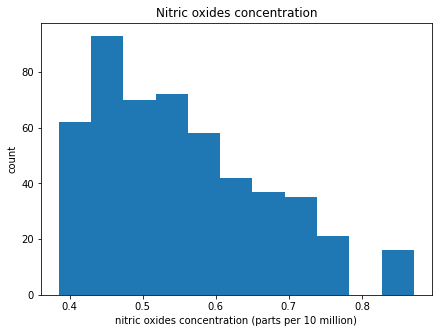

It seems we could most assimilate the Nitric oxide concentration to a Log-Normal distribution.


In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.hist(data_df.iloc[:, 4], bins=11)
plt.title('Nitric oxides concentration')
plt.xlabel('nitric oxides concentration (parts per 10 million)')
plt.ylabel('count')
plt.show()

print("It seems we could most assimilate the Nitric oxide concentration to a Log-Normal distribution.")

The boxplot clearly shows the IQR concentration as well as a long right tail.


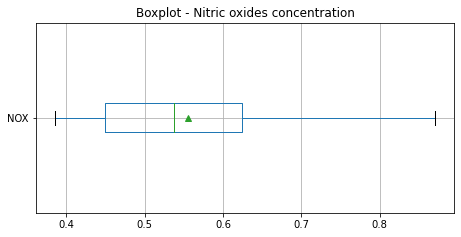

In [3]:
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.title('Boxplot - Nitric oxides concentration');
boxplot = df.boxplot(column=['NOX'], vert=False, showmeans=True, figsize=(6,8))
print("The boxplot clearly shows the IQR concentration as well as a long right tail.")

#### Answer 1.3

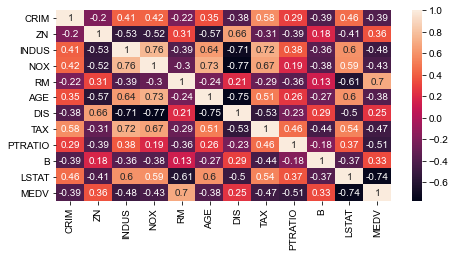

In [4]:
import seaborn as sn
import matplotlib.pyplot as plt

# To also include the price houses in the correlation matrix - add the target as another column
df["MEDV"] = boston_data.target;

corrMatrix = df.corr().round(2)
sn.heatmap(corrMatrix, annot=True)
sn.set_style(style='white')
plt.rcParams["figure.figsize"] = [7,10]
plt.show()

The above correlation matrics points on few correlations : 
1. Positive correlation of 0.91 between TAX and RAD. I.e. assets with higher acceibility to radial highways have higher tax
2. Negative correlation of -0.77 between DIS and NOX. I.e. the more distant an asset is from the 5 central centers in Boston, the less nitric oxides concentration will it have
    
    The unusual feature is the CHAS - which has the lowest correlation to any other feature.

#### Answer 1.4

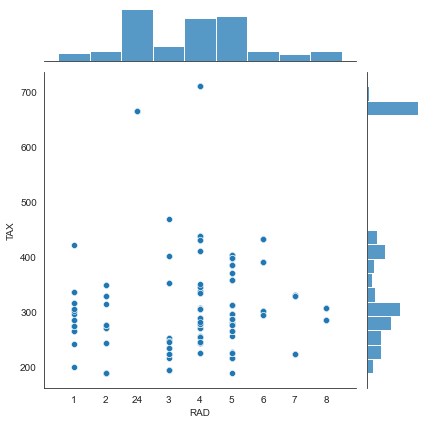

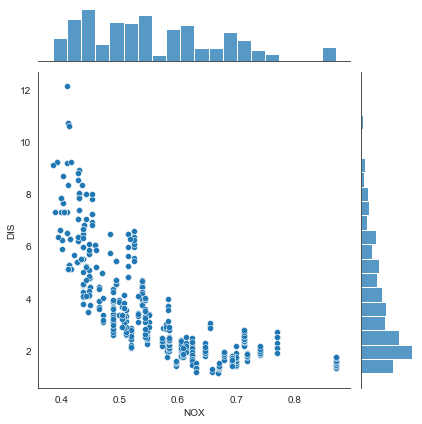

In [5]:
sn.jointplot(x="RAD", y="TAX", data=df, marginal_kws=dict(bins=20)).set_axis_labels("RAD", "TAX")
sn.jointplot(x="NOX", y="DIS", data=df, marginal_kws=dict(bins=20)).set_axis_labels("NOX", "DIS")
plt.show()

#### Answer 1.5

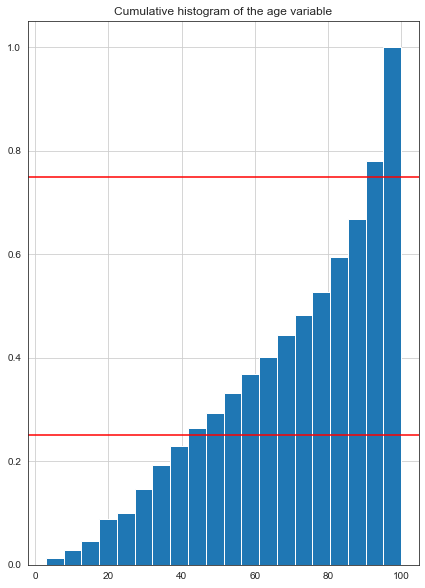

In [6]:
df['AGE'].hist(density= True,cumulative = True, bins= 20)

plt.title('Cumulative histogram of the age variable')
plt.axhline(1/4, color='r')
plt.axhline(3/4, color='r',)
plt.rcParams['figure.figsize'] = [12,10]
plt.show()

#### Answer 1.6

From the correlation matrix above it can be inferred that :
1. RM is highly positively correlated with the proces of houses. I.e. the more rooms in the house, the expensive it is.
2. LSTAT is highly negatively correlated with the house prices. I.e. the larger the % of the low class in the population in a certain area, the cheaper the houses are in that area.

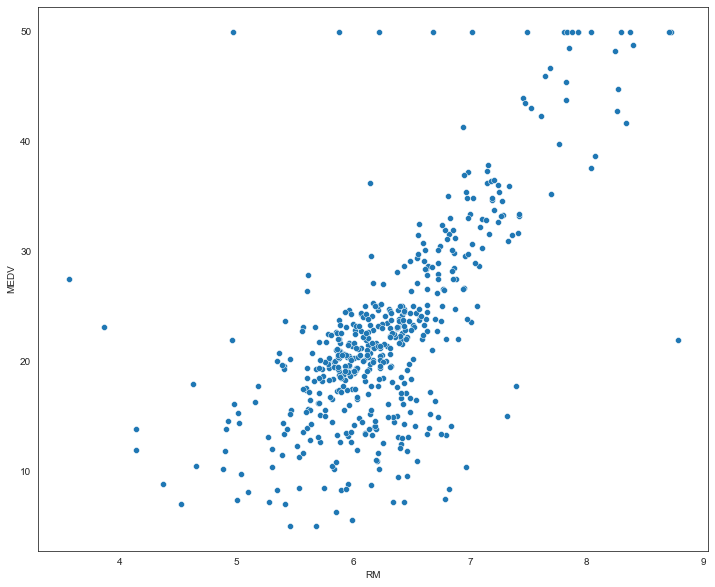

In [7]:
df["MEDV"] = boston_data.target;
sn.scatterplot(data=df, x="RM", y="MEDV")
sn.set(rc={'figure.figsize':(10,10)})

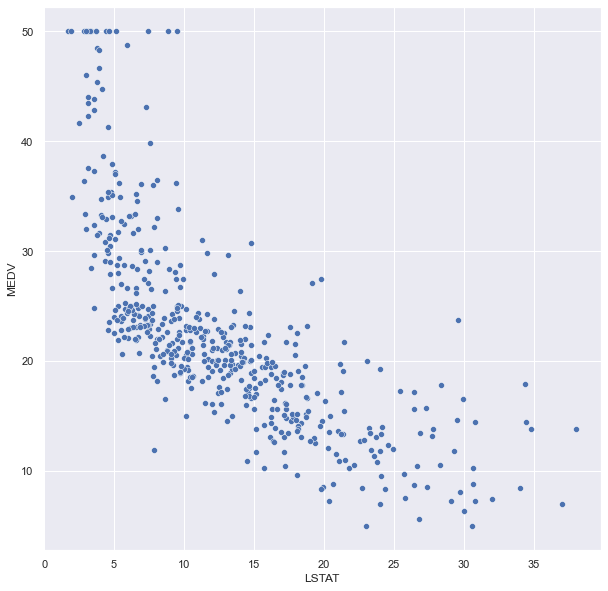

In [8]:
sn.scatterplot(data=df, x="LSTAT", y="MEDV")
sn.set(rc={'figure.figsize':(10,10)})
sn.set_style(style='white')

### Section 2 - Independence and conditional independence

#### 2.A
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k=2$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

***Answer*** 

Since we don't know the distribution type of X,Y,Z we can define the joint distribution in its most simplistic form based on all possible outcome probabilities i.e the pmf.
There are 2*n*m possible outcomes each with it's own probability, so 2*n*m-1 "p's" (because they sum up to 1) resulting in a total of  $2nm-1 $ parameters.

#### 2.B
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

***Answer***

Since the random variables are independant we can define each random varialbe with all its possible outcome p's and sum up the result.

For X : $n-1$

For Y : $m-1$

For Z : $2-1$

In total : $n-1+m-1+1 = n+m-1 $ parameters.



#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

***Answer***

X,Y are conditionaly independant given Z, meaning :
$P(X=x,Y=y,Z=z)=P(X=x,Y=y|Z=z)*P(Z=z)=P(X=x|Z=z)*P(Y=Y|Z=z)*P(Z=z)$

In this case $P_{x}, P_y$ have two different possible outcome given Z.

To define Z we need 2-1 parameters

To define X we need 2(n-1) parameters

To define Y we need 2(m-1) parameters

In total to define the joint distribution we need:

$ 1+2n-2+2m-2 = 2n+2m-3 $ parameters






#### 2.D
Give an example for a joint distribution of $\ X, Y \ $ and $Z$ where $X$ and $Y$ are NOT conditionally independent given $Z$, but $X$ and $Y$ are (unconditionally) independent.

Where $X$ and $Y$ are standard normal distribution ($N(0, 1)$).

***Answer***

We want :  $ X \bot Y $ & $P(X=x|Y=y,Z=z)\neq P(X=x|Z=z)$ & $P(Y=y|X=x,Z=z)\neq P(Y=y|Z=z)$

Let's show an example:

$f_x(x) =\frac1{\sqrt{2\pi}}{exp}{\frac{-x^2}{2}} $

$f_y(y) =\frac1{\sqrt{2\pi}}{exp}{\frac{-y^2}{2}} $


$f_z(x,y) = f_x(x)-f_y(y)$


So $ X\thicksim N(0,1)$  ,  $Y\thicksim N(0,1)$

X and Y are independant.

X given only Z is not equal to X given Z and Y. The same applies to Y.

For example if $f_z=0$ all we know is that |x|=|y|.
if we are given $f_z=0$ and y=1 than x is 1 or -1.
 



### Section 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD_2021.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3$. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

In [9]:
from numpy import genfromtxt
from sklearn import mixture

print(f'Use the Expectation-Maximization (EM) algorethm implemented by sklearn:\n')

values = genfromtxt("GMD_2021.csv", delimiter=',')[:,1].reshape(-1, 1)
gmm = mixture.GaussianMixture(n_components=3, covariance_type='full').fit(values)


print(f'mu1 = {round(gmm.means_[0][0],3)}, Mu2 = {round(gmm.means_[1][0],3)}, Mu3 = {round(gmm.means_[2][0],3)}')
print(f'sigma1 = {round(np.sqrt(gmm.covariances_[0][0][0]),3)}, sigma2 = {round(np.sqrt(gmm.covariances_[1][0][0]),3)}, sigma3 ={round(np.sqrt(gmm.covariances_[2][0][0]),3)}')
print(f'w1 = {round(gmm.weights_[0],3)}, w2 = {round(gmm.weights_[1],3)}, w3 = {round(gmm.weights_[2],3)}')

Use the Expectation-Maximization (EM) algorethm implemented by sklearn:

mu1 = 15.104, Mu2 = 8.998, Mu3 = 4.084
sigma1 = 1.499, sigma2 = 0.526, sigma3 =0.469
w1 = 0.625, w2 = 0.25, w3 = 0.125


C:\Users\ADAMV\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [10]:
mu, var = values.mean(), values.var()

print(f"For the second way we will use the general mean {round(mu,2)} and variance : {round(var,2)} of the whole GMM");

For the second way we will use the general mean 12.2 and variance : 17.57 of the whole GMM


The expectation of GMM is defined by : $$E(GMM)=\sum_{i=1}^{2}w_{i}E(X_{i})$$
$$12.2 = w_{1}*4 + 0.25*9 + w_{3}*\mu_{3} $$
$$9.9 = 4*w_{1} + w_{3}*\mu_{3} $$

The weights sum up to 1. Therefore : $$w_{1} = 0.75 - w_{3}$$

The variance of a GMM is defined by : 
$$Var(GMM)=\sum_{i=1}^{2}w_{i}V(x_{i})+\sum_{i=1}^{2}w_{i}(\mu_{i}-\mu)^{2}$$
$$17.57 = w_{1}*0.5^{2} + 0.25*0.5^{2} + w_{3}*1.5^{2} + w_{1}(4-12.2)^{2} + 0.25*(9-12.2)^{2} + w_{3}*(\mu_{3} - 12.2)^{2}$$
$$.$$
$$.$$
$$.$$
$$2w_{3}^{2} - 77.5w_{3} + 47.61 = 0$$

$$(w_{3} = 0.625) \lor (w_{3} = 38.12)$$

if $$w_{3} = 38.12  \Longrightarrow w1 = 0.75 - 38.12 < 0$$ 
However, weights should be non negative numbers, therefor :
$$w_{3} = 0.625$$
$$w_{1} = 0.75 - 0.625 = 0.125 $$

Now, assign the values in the 1st equation : 

$$9.9 = 0.125*4 + 0.615*\mu_{3} $$
$$\Downarrow$$
$$\mu_{3} = 15.28$$

#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

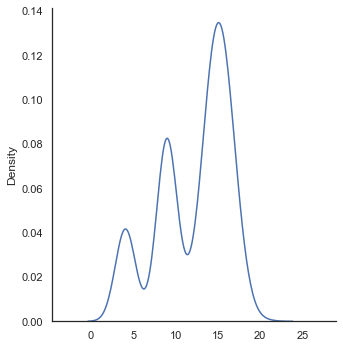

In [11]:
# calculate the std of the whole GMM dist
sigma = np.sqrt(var)
sn.displot(values, kind="kde", legend=False)

# set the axis limits to [-4, +4] stds around the mean
plt.xlim(xmin=mu -4*sigma, xmax=mu + 4*sigma)
plt.show()

#### 3.C
Now assume that the data comes from a Gaussian mixture distribution (GMD) with $k=4$.

The given data and parameters stay the same.

Can you estimate the unknown parameters in the two ways described in section A? Explain.

We will be able to use the 1st way, but not the 2nd way. I.e we could use the implementation of EM for GMM distributions provided by sklearn, by passing n_components=4
However, we will not be able to use algebry as we did in the 2nd way, since GMM with K=4 adds up more unknown parameters
$$(w_4, \mu_{4}, \sigma_4)$$

#### 3.D
Describe two ways for generating data for a GMM random variable with:
* centers at  $\mu_1=3, \mu_2=7, \mu_3=10$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

In [12]:
import numpy as np

### since the weights of all gaussians are equals, we should have the same amount of observationas in each gaussian, he
def generage_gmm1(mu1, mu2, mu3, sig1, sig2, sig3, sampleSize):
    g1 = np.random.normal(mu1, sig1, int(sampleSize /3));
    g2 = np.random.normal(mu2, sig2, int(sampleSize /3));
    g3 = np.random.normal(mu3, sig3, int(sampleSize /3));
    
    return np.concatenate((g1, g2, g3), axis = None);

def generage_gmm2(mu1, mu2, mu3, sig1, sig2, sig3, sampleSize):
    dist=np.empty(sampleSize);
    for i in range(sampleSize):
        dist[i] = GetNumFromGmm(mu1, mu2, mu3, sig1, sig2, sig3)
    
    return dist;

def GetNumFromGmm(mu1, mu2, mu3, sig1, sig2, sig3):
    # randomly pick gaussian 
    pickGaussian = np.random.randint(1, 4);

    if(pickGaussian == 1):
        return np.random.normal(mu1, sig1);
    if(pickGaussian == 2): 
        return np.random.normal(mu2, sig2);

    return np.random.normal(mu3, sig3);

#### 3.E
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


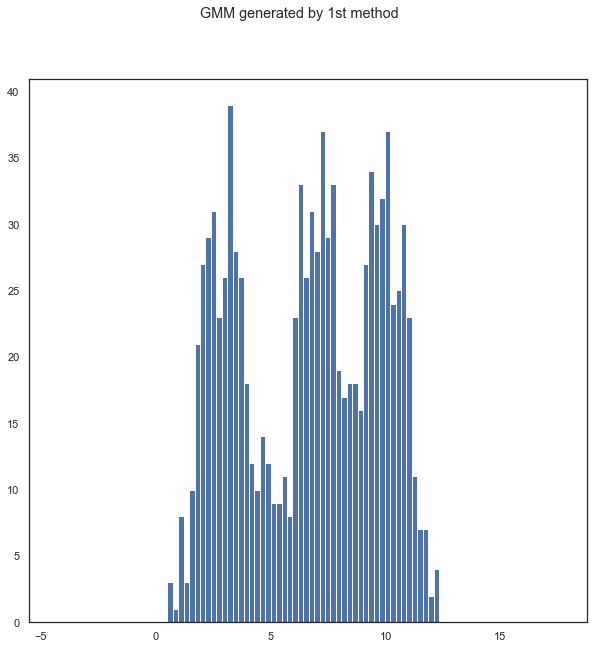

In [13]:
dist1 = generage_gmm1(3,7,10,1,1,1, 1000)
fig, axes = plt.subplots(1, 1)
mu1 = dist1.mean()
sigma1 = np.sqrt(dist1.var())
plt.xlim(xmin=mu1 -4*sigma1, xmax=mu1 + 4*sigma1)
plt.rcParams["figure.figsize"] = [10,15]

_ =fig.suptitle('GMM generated by 1st method')
_ =axes.hist(dist1, bins=50)
plt.plot()
plt.show()

#### 3.F
Use the other one to generate 1000 more points and draw two comparative histograms.

[]

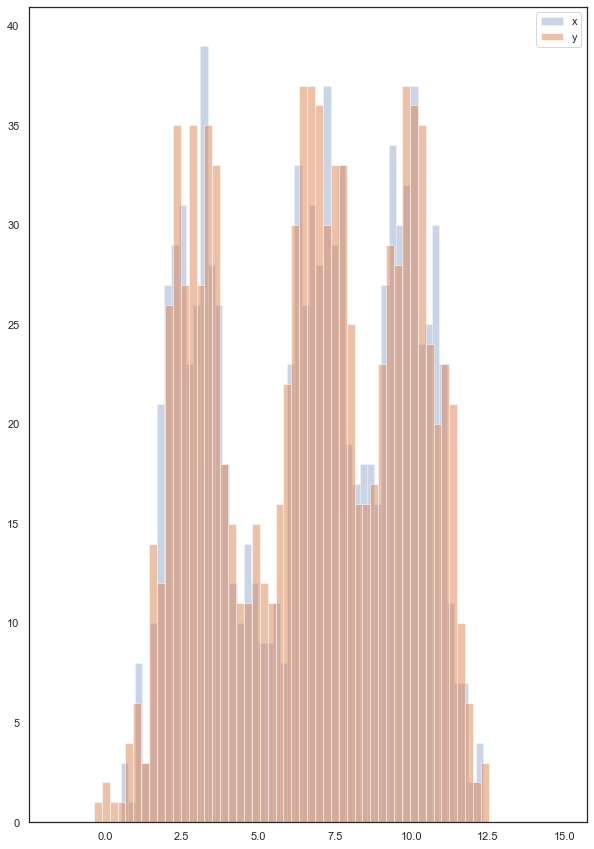

In [14]:
dist2 = generage_gmm2(3,7,10,1,1,1, 1000)
plt.xlim(xmin=mu1 -3*sigma1, xmax=mu1 + 3*sigma1)
plt.rcParams["figure.figsize"] = [8,8]

fig.suptitle('Comparative Histogram of 2 randomly generated GMM')
plt.hist(dist1, bins=50, label='x', alpha = 0.3)
plt.hist(dist2, bins=50, label='y', alpha=0.5)

plt.legend(loc='upper right')
plt.plot()

### Section 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 70,000 RCU and a standard deviation of 30,000 RCU.

#### 4.A
What percent of people earn less than 50,000 RCU?

Percent of people who earn less than 50,000 RCU: 25.249%


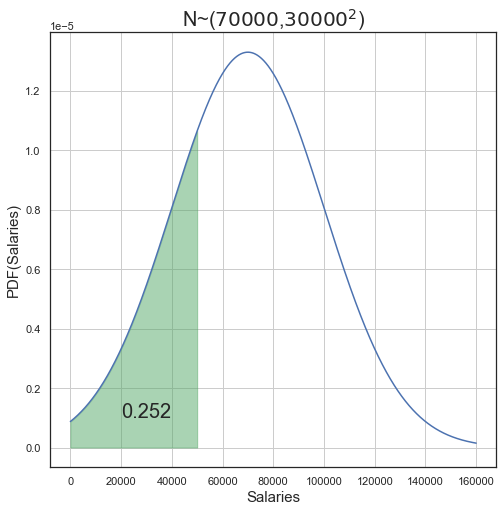

In [15]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

salaries = np.linspace(0,160000,160000)
rv_normal_pdf = norm.pdf(salaries , loc = 70000 , scale = 30000 )
fig, ax = plt.subplots(1,1)
ax.set_title("N~($70000$,$30000^2$)",fontsize=20)
ax.set_xlabel('Salaries',fontsize=15)
ax.set_ylabel('PDF(Salaries)',fontsize=15)
ax.grid(True)
ax.plot(salaries, norm.pdf(salaries,70000,30000))
lessThan50000=np.linspace(0,50000,50000)
ax.fill_between(lessThan50000,norm.pdf(lessThan50000,70000,30000),0,alpha=0.5, color='g')
cdf50=norm.cdf(x=50000, loc=70000, scale=30000)
ax.text(20000,0.000001,round(cdf50,3),fontsize=20)
print("Percent of people who earn less than 50,000 RCU: {}%".format(round((cdf50*100),3)))
plt.show()

#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

In [16]:
cdf65=norm.cdf(x=65000, loc=70000, scale=30000)
cdf45=norm.cdf(x=45000, loc=70000, scale=30000)
iqr45_65 = cdf65-cdf45
print("Percent of people who earn between 45,000 to 65,000 RCU is:{}%".format(round(iqr45_65*100,3)))

Percent of people who earn between 45,000 to 65,000 RCU is:23.149%


#### 4.C
What percent of people earn more than 70,000 RCU?

In [17]:
cdf70=norm.cdf(x=70000, loc=70000, scale=30000)
print("Percent of people who earn more than 70000 RCU is:{}%".format(round((1-cdf70)*100,3)))
# We can immediately return 50% since the distribution is normal and we know the mean is 70,000 RCU

Percent of people who earn more than 70000 RCU is:50.0%


#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

In [18]:
cdf140=norm.cdf(x=140000, loc=70000, scale=30000)
moreThan140 = 1-cdf140
numOfEmployees = int(1000*moreThan140)
print("We can expect {} employees to have a larger salary than 140,000 RCU".format(numOfEmployees))

We can expect 9 employees to have a larger salary than 140,000 RCU


### Section 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

In [19]:
from scipy.stats import geom
from fractions import Fraction
#function computes E(Xi)
def E_x(i,n):
    return (n-i+1)/n
#function computes E(T=X1+X2+...Xn)
def E_t(n):
    harmonic = sum(Fraction(1, d) for d in range(1, n + 1))
    Et = n*(harmonic)
    return float(round(Et,2))
print ("E_30 : {}".format(E_t(30)))

E_30 : 119.85


#### 5.B
Write code to compute the exact value of $V(T_{N})$

In [20]:
#using the independance of random variables Xi we obtain V(T)=V(X1+X2+...+Xn)=V(X1)+V(X2)+...+V(Xn)=V(1-p1/p1^2)+...+V(1-pn/pn^2)
def V_t (n):  
    totalVariance = sum((1-E_x(i,n))/E_x(i,n)**2 for i in range(1, n + 1))
    return totalVariance
print ("V_30: {}".format(V_t(30)))

V_30: 1331.085491913826


#### 5.C
Write code to exactly compute $P(T_{30}>60)$

In [21]:
cash = {} # we start by creating a dictionary of previous results since the calculation will be recursive
total_coupons = 30
def geometric_i (i,k,total_coupons): #calculates prob for i'th coupon to roll on k'th experiment out of total required coupons
    p = (total_coupons-i+1)/total_coupons
    return p * (1-p)**(k-1)
def P_TN (N,k): #returns probability of T_N being smaller than k
    if (N,k) in cash:
        return cash[(N,k)]
    elif (N==0):
        cash[(N,k)] =  1
        return 1
    elif (k==0):
        cash[(N,k)] =  0
        return 0 
    elif (N>k):
        cash[(N,k)] =  0
        return 0
    elif (N==1 and k==1):
        cash[(N,k)] =  1
        return 1
    else:
        result=0
        for i in range (1,k):
            result = result + geometric_i(N,i,total_coupons) * P_TN(N-1,k-i)
        cash[(N,k)] = result
        return result
P30_60 = round(1-P_TN(30,60),3)
print ("Probabilty of getting all 30 coupons in more than 60 trials is: {}".format(P30_60))

Probabilty of getting all 30 coupons in more than 60 trials is: 0.994


#### 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results

We know based on Chebyshev that 
$$\forall k > 0 \;\; ,  P(|X-\mu|\geq k\sigma) \leq \frac{1}{k^2}$$ 
$ P(X-\mu \leq -k\sigma) + P(X-\mu \geq k\sigma) \leq \frac{1}{k^2} $

Since $P\geq 0 \Longrightarrow P(X-\mu \leq -k\sigma)\leq \frac{1}{k^2} $

$ P(X \leq \mu -k\sigma)\leq \frac{1}{k^2} $

Meaning the probability of X being on an intervel from 0 to k std's from mean is smaller than $\frac{1}{k^2}$

$P(T_{30}>60) = 1- P(T_{30}\leq60)$

$P(T_{30}\leq60) \Longrightarrow 60=\mu -k\sigma \Longrightarrow k= 1.64 $

$P(T_{30}\leq60) \leq 0.371 \Longrightarrow P(T_{30}>60)\geq 0.628 $

Meaning the lower bound is 0.628 wich is consistant with our result of 0.994


In class we showed that based on Chebyshev : $$ P(T\geq nH(n) +cn) \leq \frac{V(T)}{c^2n^2} $$

since c in this case is negative we can't claim an upper bound